# Autos Exoloratory Data Analysis Manuel Zapata

## Variables:
* normalized losses: loss of energy
* make: assembler
* num of doors: vehicle doors
* body style: vehicle type
* drive wheels: traccion
* engine location: lace where motor is located
* engine type: car engine type
* city- L/100km: is the relationship between the distance a car can travel and the number of liters of fuel consumed to travel that distance
* horse power: mechanical work done by a motor.

Import main libraries

### Data exploration, segmentations and groupings

In [50]:
import numpy as np
import pandas as pd

* Read data and show first intances

In [51]:
df = pd.read_csv("https://raw.githubusercontent.com/Malezaja/data/master/auto.csv", index_col= 'Unnamed: 0')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


* Show last instances

In [52]:
df.tail()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0
200,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0,12.368421,Medium,0,1


* Summary of numerical data, you can see the main statistical measures.

In [53]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


* Information about the content of the dataset columns

In [54]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

* Explore data type

In [55]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

* It's important see some information about columns as null data and count of types of variables

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

* Another summary including text columns

In [57]:
df.describe(include='object')

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


* You can summarize an individual field

In [58]:
df.price.describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

And explore inside a variable as well

In [59]:
df.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

* ¿How many records are there in the column by assembler?

In [60]:
df.make.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
alfa-romero       3
chevrolet         3
jaguar            3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

* Let's do masking: shows instances wiht number of doors equal four and sedan body syle and price greater than or equal to 10000 dollars

In [61]:

df.loc[(df['num-of-doors'] == 'four') & (df['body-style'] == 'sedan') & (df['price'] >= 10000)]

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,0.991667,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0,12.368421,Medium,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,0.991667,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0,13.823529,Medium,0,1
10,0,192,bmw,std,four,sedan,rwd,front,101.2,0.849592,0.900000,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16925.0,10.217391,Low,0,1
12,0,188,bmw,std,four,sedan,rwd,front,101.2,0.849592,0.900000,54.3,2765,ohc,six,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,21105.0,11.190476,Medium,0,1
13,1,122,bmw,std,four,sedan,rwd,front,103.5,0.908217,0.929167,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0,11.750000,Medium,0,1
14,0,122,bmw,std,four,sedan,rwd,front,103.5,0.908217,0.929167,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0,14.687500,High,0,1
16,0,122,bmw,std,four,sedan,rwd,front,110.0,0.946660,0.984722,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0,15.666667,High,0,1
39,0,85,honda,std,four,sedan,fwd,front,96.5,0.842864,0.868056,54.1,2372,ohc,four,110,1bbl,3.15,3.58,9.0,86.0,5800.0,27,33,10295.0,8.703704,Low,0,1


* Let's do segment: all instances for price and manufacturer

In [62]:

df.loc[:,['make','price']]

,make,price
0,alfa-romero,13495.0
1,alfa-romero,16500.0
2,alfa-romero,16500.0
3,audi,13950.0
4,audi,17450.0
...,...,...
196,volvo,16845.0
197,volvo,19045.0
198,volvo,21485.0
199,volvo,22470.0


* Let's modify the column num-of-doors

In [63]:
df['num-of-doors'].map({'four' : 4, 'two' : 2})

0      2
1      2
2      2
3      4
4      4
      ..
196    4
197    4
198    4
199    4
200    4
Name: num-of-doors, Length: 201, dtype: int64

In [64]:
df['num-of-doors'] = df['num-of-doors'].map({'four' : 4, 'two' : 2})

In [65]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,2,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,2,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,2,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,4,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,4,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


* We often like to observ some measures a little more summarized in a few characteristics

* In dataset on average the cars are priced at $13000, the instances are completed in all variables, that is why, we don't need to treat null data. Besides, we can see values for motor's normalized losses. The energy to move a car is between 12% and 13%, the rest is lost due to inefficiency in the engine and the use of accesories

In [66]:
df.price.agg(['mean', 'max', 'min'])

mean    13207.129353
max     45400.000000
min      5118.000000
Name: price, dtype: float64

In [67]:
df.make.agg(['nunique', 'count'])

nunique     22
count      201
Name: make, dtype: int64

In [68]:
df.aggregate({'price': ['count','mean', 'std', 'min', 'max'], 'normalized-losses':['count', 'mean', 'std', 'min', 'max'] })

,price,normalized-losses
count,201.000000,201.00000
mean,13207.129353,122.00000
std,7947.066342,31.99625
min,5118.000000,65.00000
max,45400.000000,256.00000


Let's categorize variale price with de following terms:
- values below and above the mean, lower and higher respectively. method: apply
- values random in three parts. method: cut of pandas library.

In [69]:
media = df.price.mean()
media

13207.129353233831

In [70]:
def categoria(df):
  if df.price >= media:
    return 'superior'
  else:
    return 'inferior'

In [71]:
df.apply(categoria, axis = 1)

0      superior
1      superior
2      superior
3      superior
4      superior
         ...   
196    superior
197    superior
198    superior
199    superior
200    superior
Length: 201, dtype: object

In [72]:
df['categoria_precio'] = df.apply(categoria, axis = 1)

In [73]:
df.sample(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas,categoria_precio
158,0,91,toyota,std,4,sedan,fwd,front,95.7,0.799135,0.894444,52.8,2140,ohc,four,98,2bbl,3.19,3.03,9.0,70.0,4800.0,28,34,9258.0,8.392857,Low,0,1,inferior
84,1,125,mitsubishi,turbo,4,sedan,fwd,front,96.3,0.828448,0.908333,51.6,2403,ohc,four,110,spdi,3.17,3.46,7.5,116.0,5500.0,23,30,9279.0,10.217391,Medium,0,1,inferior
27,-1,110,dodge,std,4,wagon,fwd,front,103.3,0.839020,0.897222,59.8,2535,ohc,four,122,2bbl,3.34,3.46,8.5,88.0,5000.0,24,30,8921.0,9.791667,Low,0,1,inferior
30,2,137,honda,std,2,hatchback,fwd,front,86.6,0.694858,0.887500,50.8,1819,ohc,four,92,1bbl,2.91,3.41,9.2,76.0,6000.0,31,38,6855.0,7.580645,Low,0,1,inferior
48,1,104,mazda,std,2,hatchback,fwd,front,93.1,0.764536,0.891667,54.1,1900,ohc,four,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6095.0,7.580645,Low,0,1,inferior


In [74]:
pd.cut(df.price, bins = 3, labels = ['inferior', 'medio', 'superior'])

0      inferior
1      inferior
2      inferior
3      inferior
4      inferior
         ...   
196    inferior
197       medio
198       medio
199       medio
200       medio
Name: price, Length: 201, dtype: category
Categories (3, object): ['inferior' < 'medio' < 'superior']

In [75]:
df['categoria_precio_3partes'] = pd.cut(df.price, bins = 3, labels = ['inferior', 'medio', 'superior'])

In [76]:
df.sample(7)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas,categoria_precio,categoria_precio_3partes
189,0,122,volkswagen,std,4,wagon,fwd,front,100.4,0.879865,0.929167,55.1,2563,ohc,four,109,mpfi,3.19,3.40,9.0,88.0,5500.0,25,31,12290.0,9.400000,Low,0,1,inferior,inferior
99,0,108,nissan,std,4,wagon,fwd,front,100.4,0.887074,0.923611,56.1,3296,ohcv,six,181,mpfi,3.43,3.27,9.0,152.0,5200.0,17,22,14399.0,13.823529,Medium,0,1,superior,inferior
26,1,148,dodge,turbo,4,sedan,fwd,front,93.7,0.755887,0.886111,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0,9.791667,Medium,0,1,inferior,inferior
96,0,106,nissan,std,4,hatchback,fwd,front,97.2,0.833253,0.905556,54.7,2324,ohc,four,120,2bbl,3.33,3.47,8.5,97.0,5200.0,27,34,8949.0,8.703704,Low,0,1,inferior,inferior
91,1,128,nissan,std,2,sedan,fwd,front,94.5,0.794330,0.886111,54.5,1951,ohc,four,97,2bbl,3.15,3.29,9.4,69.0,5200.0,31,37,7299.0,7.580645,Low,0,1,inferior,inferior
137,0,102,subaru,std,4,sedan,fwd,front,97.2,0.826526,0.908333,52.5,2145,ohcf,four,108,2bbl,3.62,2.64,9.5,82.0,4800.0,32,37,7126.0,7.343750,Low,0,1,inferior,inferior
153,0,91,toyota,std,4,hatchback,fwd,front,95.7,0.799135,0.894444,52.8,2109,ohc,four,98,2bbl,3.19,3.03,9.0,70.0,4800.0,30,37,7198.0,7.833333,Low,0,1,inferior,inferior


* We are going to make do groups

In [77]:
df.groupby('make').size().sort_values(ascending = False)

make
toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
chevrolet         3
alfa-romero       3
jaguar            3
isuzu             2
renault           2
mercury           1
dtype: int64

In [78]:
df.groupby('make').price.max().sort_values(ascending = False)

make
mercedes-benz    45400.0
bmw              41315.0
porsche          37028.0
jaguar           36000.0
audi             23875.0
volvo            22625.0
nissan           19699.0
saab             18620.0
mazda            18344.0
peugot           18150.0
toyota           17669.0
mercury          16503.0
alfa-romero      16500.0
mitsubishi       14869.0
volkswagen       13845.0
dodge            12964.0
honda            12945.0
plymouth         12764.0
subaru           11694.0
isuzu            11048.0
renault           9895.0
chevrolet         6575.0
Name: price, dtype: float64

In [79]:
df.groupby(['body-style', 'num-of-cylinders']).price.agg(['min','max'])

min      max
body-style  num-of-cylinders                  
convertible eight             35056.0  35056.0
            four              11595.0  17669.0
            six               37028.0  37028.0
hardtop     eight             45400.0  45400.0
            five              28176.0  28176.0
            four               8249.0  11199.0
            six               32528.0  34028.0
hatchback   four               5118.0  22018.0
            six               15998.0  19699.0
            three              5151.0   5151.0
            two               10945.0  15645.0
sedan       eight             34184.0  40960.0
            five              13295.0  31600.0
            four               5499.0  22625.0
            six               13499.0  41315.0
            twelve            36000.0  36000.0
wagon       five              18920.0  28248.0
            four               6918.0  18950.0
            six               14399.0  15750.0

* We are going to rename columns to make another groups

In [80]:
def col_name(x):
  return x.replace('-','').replace('_','')

In [81]:
df = df.rename(col_name, axis = 'columns')

In [82]:
df.sample(5)

,symboling,normalizedlosses,make,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,length,width,height,curbweight,enginetype,numofcylinders,enginesize,fuelsystem,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,cityL/100km,horsepowerbinned,diesel,gas,categoriaprecio,categoriaprecio3partes
104,0,161,peugot,std,4,sedan,rwd,front,107.9,0.897165,0.950000,56.7,3020,l,four,120,mpfi,3.46,3.19,8.4,97.0,5000.0,19,24,11900.0,12.368421,Low,0,1,inferior,inferior
195,-1,74,volvo,turbo,4,wagon,rwd,front,104.3,0.907256,0.933333,57.5,3157,ohc,four,130,mpfi,3.62,3.15,7.5,162.0,5100.0,17,22,18950.0,13.823529,High,0,1,superior,medio
31,1,101,honda,std,2,hatchback,fwd,front,93.7,0.720807,0.888889,52.6,1837,ohc,four,79,1bbl,2.91,3.07,10.1,60.0,5500.0,38,42,5399.0,6.184211,Low,0,1,inferior,inferior
88,1,128,nissan,std,2,sedan,fwd,front,94.5,0.794330,0.886111,54.5,1918,ohc,four,97,2bbl,3.15,3.29,9.4,69.0,5200.0,31,37,6649.0,7.580645,Low,0,1,inferior,inferior
32,1,101,honda,std,2,hatchback,fwd,front,93.7,0.720807,0.888889,52.6,1940,ohc,four,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,6529.0,7.833333,Low,0,1,inferior,inferior


- Energy loss by engine type

In [83]:
df.groupby('enginetype').normalizedlosses.agg(['min','max','mean'])

,min,max,mean
enginetype,,,
dohc,90,197,142.250000
l,121,161,144.666667
ohc,65,256,118.593103
ohcf,83,122,98.200000
ohcv,95,231,139.230769
rotor,150,150,150.000000


- Energy loss by engine type and engine size

In [84]:
df.groupby(['enginetype', 'enginesize']).normalizedlosses.agg(['min','max','mean'])

min  max        mean
enginetype enginesize                      
dohc       98          168  168  168.000000
           121         104  150  127.000000
           130         122  122  122.000000
           161         122  122  122.000000
           171          90  197  161.333333
           258         122  145  133.500000
l          61          121  121  121.000000
           120         122  161  145.400000
           134         161  161  161.000000
           152         122  161  145.400000
ohc        79          101  101  101.000000
           90           81  154  128.600000
           91          104  113  107.600000
           92           74  161  109.600000
           97           94  168  120.153846
           98           91  168  124.250000
           103         128  128  128.000000
           108         192  192  192.000000
           109          94  256  133.500000
           110          65  153  103.000000
           111         122  122  122.000000
           119         122  122  122.000000
           120         106  106  106.000000
           121         104  150  127.000000
           122          65  153  104.800000
           130          74  103   88.500000
           131         158  158  158.000000
           132         122  122  122.000000
           134         122  122  122.000000
           136         122  164  137.600000
           140         118  122  120.000000
           141          74  103   91.285714
           145          95   95   95.000000
           146         134  134  134.000000
           151         186  186  186.000000
           156         122  145  126.600000
           164         122  188  166.000000
           183          93   93   93.000000
           209         122  122  122.000000
ohcf       97           83   83   83.000000
           108          83  102   93.090909
           194         122  122  122.000000
ohcv       152         122  122  122.000000
           173          95   95   95.000000
           181         108  231  160.500000
           234         122  142  132.000000
           304         122  122  122.000000
           308         122  122  122.000000
           326         122  122  122.000000
rotor      70          150  150  150.000000
           80          150  150  150.000000

In [85]:
df.numofcylinders.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

* Let's aggregate a new column mapping num of cylinders column keeping original column

In [86]:
df['numofcylinders'].map({'four': 4, 'six': 6, 'five': 5, 'three':3, 'twelve': 11, 'two': 2, 'eight': 8})

0      4
1      4
2      6
3      4
4      5
      ..
196    4
197    4
198    6
199    6
200    4
Name: numofcylinders, Length: 201, dtype: int64

In [87]:
df['numerodecilindros'] = df['numofcylinders'].map({'four': 4, 'six': 6, 'five': 5, 'three':3, 'twelve': 11, 'two': 2, 'eight': 8})

In [88]:
df.sample(1)

,symboling,normalizedlosses,make,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,length,width,height,curbweight,enginetype,numofcylinders,enginesize,fuelsystem,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,cityL/100km,horsepowerbinned,diesel,gas,categoriaprecio,categoriaprecio3partes,numerodecilindros
87,1,128,nissan,std,2,sedan,fwd,front,94.5,0.79433,0.886111,54.5,2017,ohc,four,103,idi,2.99,3.47,21.9,55.0,4800.0,45,50,7099.0,5.222222,Low,1,0,inferior,inferior,4


* it would be interesting a variable ratio, relationship between horsepower and price

In [89]:
df['horsepower']/df['price']

0      0.008225
1      0.006727
2      0.009333
3      0.007312
4      0.006590
         ...   
196    0.006768
197    0.008401
198    0.006237
199    0.004717
200    0.005039
Length: 201, dtype: float64

In [90]:
df['ratio'] = df['horsepower']/df['price']

In [91]:
df.groupby(['make'])[['ratio']].mean().sort_values(by = 'ratio', ascending = False)

,ratio
make,
mitsubishi,0.011435
dodge,0.010963
plymouth,0.010895
renault,0.010876
mercury,0.010604
chevrolet,0.010362
subaru,0.010300
honda,0.010014
nissan,0.009825


* The relationship $horsepower/price$ can vary according to price. luxurious cars are more expensive. but, generally the more luxurious cars have more horsepower on average.

In [92]:
df.groupby('make')[['horsepower']].mean().sort_values(by = 'horsepower', ascending = False)

,horsepower
make,
jaguar,204.666667
porsche,191.000000
mercury,175.000000
mercedes-benz,146.250000
bmw,138.875000
volvo,128.000000
saab,126.666667
alfa-romero,125.333333
audi,114.500000


In [93]:
df.pivot_table('price', index = 'enginetype', columns='bodystyle', aggfunc='mean')

bodystyle,convertible,hardtop,hatchback,sedan,wagon
enginetype,,,,,
dohc,14997.5,NaN,15061.000000,22281.600000,15750.000000
l,NaN,NaN,5151.000000,15758.571429,15017.500000
ohc,14632.0,13142.4,9001.153846,13134.070423,12114.133333
ohcf,37028.0,33278.0,6591.333333,9070.600000,9342.000000
ohcv,35056.0,45400.0,17949.250000,26604.500000,14399.000000
rotor,NaN,NaN,13020.000000,NaN,NaN


In [94]:
df.sample(1)

,symboling,normalizedlosses,make,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,length,width,height,curbweight,enginetype,numofcylinders,enginesize,fuelsystem,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,cityL/100km,horsepowerbinned,diesel,gas,categoriaprecio,categoriaprecio3partes,numerodecilindros,ratio
58,1,129,mazda,std,2,hatchback,fwd,front,98.8,0.854397,0.923611,53.7,2385,ohc,four,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10595.0,9.038462,Low,0,1,inferior,inferior,4,0.007928


Visualizations: Seaborn

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

* The price variable doesn't have a normal distribution according to the boxplot. We can see several outliers.

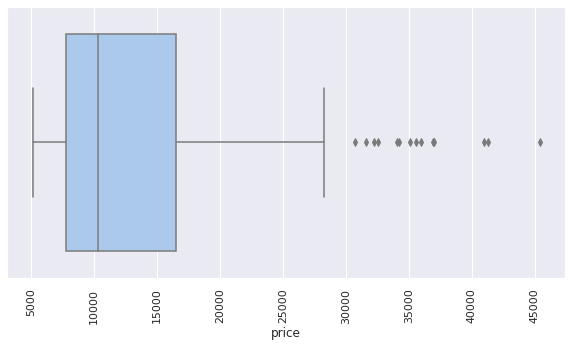

In [96]:
fig, axs = plt.subplots(1,1, figsize = (10,5))
sns.boxplot(data= df, x = 'price', orient='h' , palette='pastel')
plt.xticks(rotation = 90);

In [130]:
mediana = df.price.median()
q1 = df.price.quantile(0.25)
q3 = df.price.quantile(0.75)
IQR = q3 - q1
minimo = np.abs(q1 - 1.5*IQR)
maximo = q3 + 1.5*IQR
print(f'minimo: {minimo:}\nmaximo: {maximo}\nRango Intercuartil: {IQR}\nmediana: {mediana}\nQ1: {q1}\nQ3: {q3}')


minimo: 5312.5
maximo: 29587.5
Rango Intercuartil: 8725.0
mediana: 10295.0
Q1: 7775.0
Q3: 16500.0


* it can see that 50% of the prices are less than 10295 dollars. Besides, the price shows a positive asymmetry, that is, the prices are concentrated in the lower part of the distribution.

* We can see this by comparig the distribution of the price for each assembler. Also, it looks that the luxury brands cars are the ones who may be influencing the outliers, therefore they can't be discarded from our data.

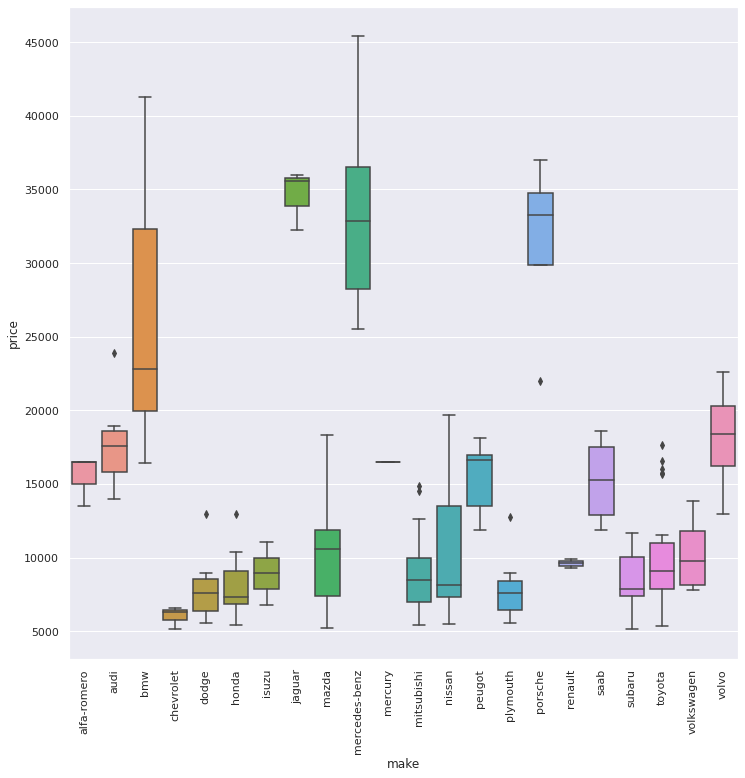

In [98]:
fig, axs = plt.subplots(1,1, figsize = (12, 12))
sns.boxplot(x = 'make', y = 'price', data = df)
plt.xticks(rotation = 90);

In [99]:
make_horsepower = df.groupby('make', as_index=False)[['horsepower']].mean().sort_values(by = 'horsepower', ascending = False)[:10]

,make,horsepower
7,jaguar,204.666667
15,porsche,191.000000
10,mercury,175.000000
9,mercedes-benz,146.250000
2,bmw,138.875000
21,volvo,128.000000
17,saab,126.666667
0,alfa-romero,125.333333
1,audi,114.500000
16,renault,104.256158


* luxury assemblers usually guarantee ustom cars for the customer by modifying their horsepower

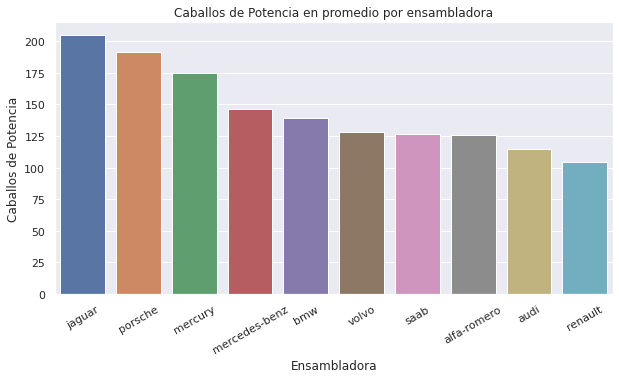

In [100]:
fig, axs = plt.subplots(1,1, figsize = (10,5))
sns.barplot(x = 'make', y = 'horsepower', data = make_horsepower)
plt.xticks(rotation = 30)
plt.xlabel('Ensambladora')
plt.ylabel('Caballos de Potencia')
plt.title('Caballos de Potencia en promedio por ensambladora');

* There isn't obvious or strong correlation between engine size and energy loss.

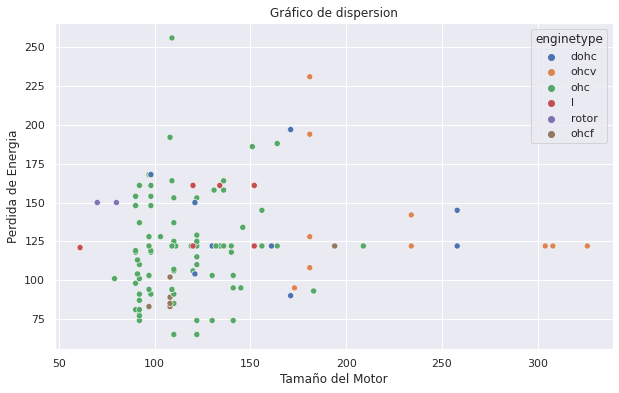

In [101]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x = 'enginesize', y = 'normalizedlosses', hue='enginetype')
plt.xlabel('Tamaño del Motor')
plt.ylabel('Perdida de Energia')
plt.title("Gráfico de dispersion");

* There is a positive correlation between price and engine performance. Whit this relationship we can consider a future predictive model to develop and classify as well.

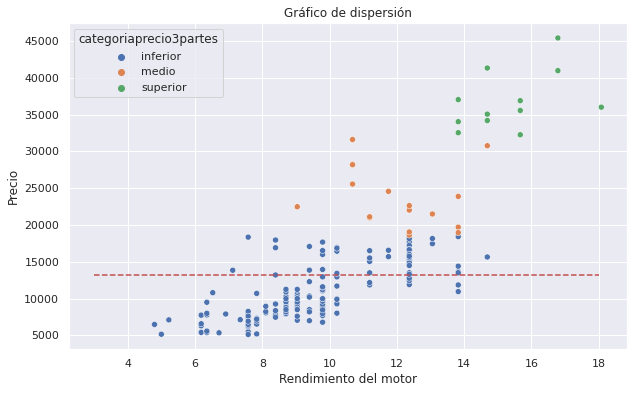

In [102]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x = 'cityL/100km', y = 'price', hue='categoriaprecio3partes')
plt.xlabel('Rendimiento del motor')
plt.ylabel('Precio')
plt.title("Gráfico de dispersión")
plt.hlines(y = media, xmin = 3, xmax = 18, label = 'Media', linestyle = '--', colors='r');

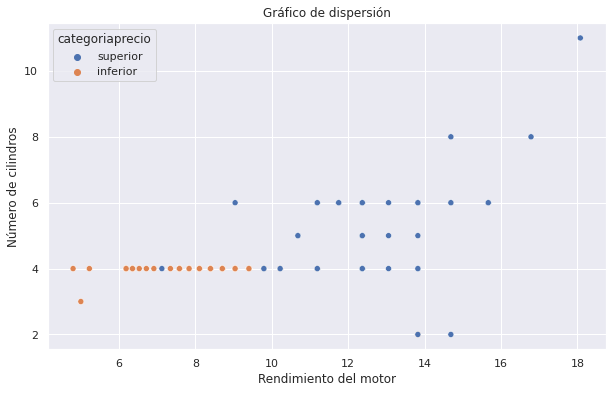

In [131]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x = 'cityL/100km', y = 'numerodecilindros', hue='categoriaprecio')
plt.xlabel('Rendimiento del motor')
plt.ylabel('Número de cilindros')
plt.title("Gráfico de dispersión");

* Furthermore, there is a positive relationship between engine size and horsepower. It would be interesting to find out if exist correlation with a three variable as price.

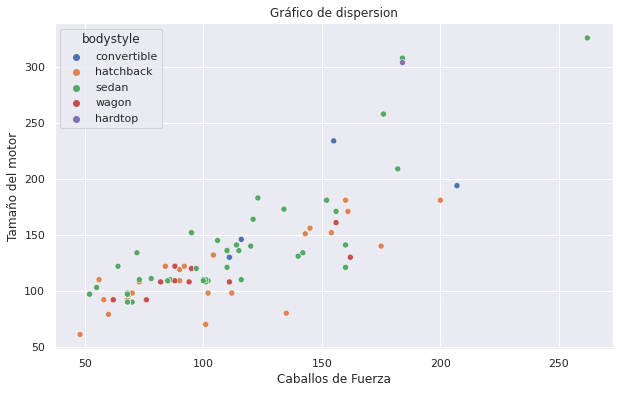

In [108]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x = 'horsepower', y = 'enginesize', hue='bodystyle')
plt.xlabel('Caballos de Fuerza')
plt.ylabel('Tamaño del motor')
plt.title("Gráfico de dispersion")
plt.show()

* Evidently there is  direct positive correlation between these two variables (horse power and engine size) with price. See the following two graphs.

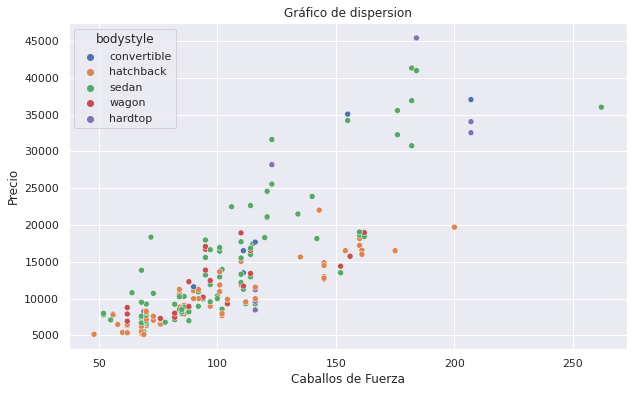

In [134]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x = 'horsepower', y = 'price', hue='bodystyle')
plt.xlabel('Caballos de Fuerza')
plt.ylabel('Precio')
plt.title("Gráfico de dispersion")
plt.show()

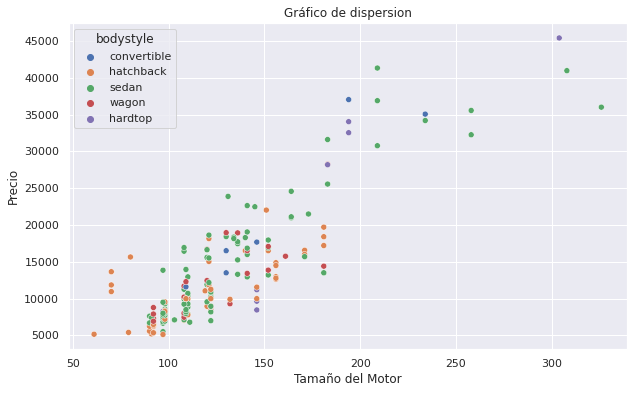

In [136]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x = 'enginesize', y = 'price', hue='bodystyle')
plt.xlabel('Tamaño del Motor')
plt.ylabel('Precio')
plt.title("Gráfico de dispersion")
plt.show()

* Now, let's see how many cars there are per price and type of body.

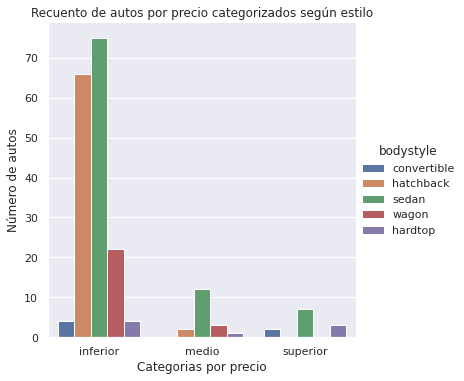

In [104]:
sns.catplot(data = df, x= 'categoriaprecio3partes', kind='count', hue='bodystyle')
plt.xlabel('Categorias por precio')
plt.ylabel('Número de autos')
plt.title("Recuento de autos por precio categorizados según estilo");

* Categorical comparisons per price, bodystyle and categorical horsepower

''

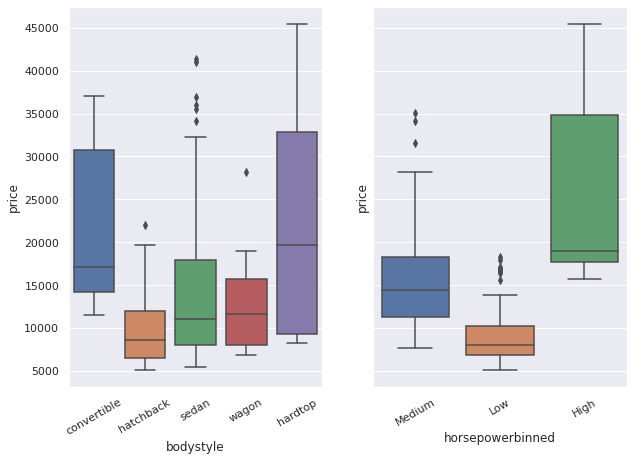

In [105]:
fig, axs = plt.subplots(1,2, figsize = (10,7), sharey=True, )
sns.boxplot(data= df, x = 'bodystyle', y = 'price', ax = axs[0])
sns.boxplot(data= df, x = 'horsepowerbinned', y = 'price', ax = axs[1])
ax1 = axs[0]
ax2 = axs[1]
plt.setp(ax1.get_xticklabels(), rotation=30)
plt.setp(ax2.get_xticklabels(), rotation=30)
;